<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB
Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object
0        9
1        4
2       26
3      

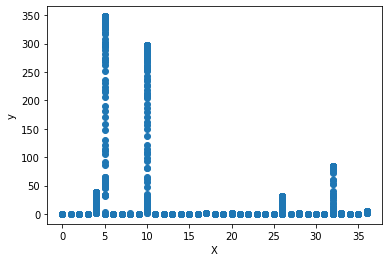

In [22]:
from sklearn.metrics import r2_score
import numpy as np 
import pandas as pd 
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("sars_2003_complete_dataset_clean.csv")
df.info()
df.Date = df.Date.apply(pd.to_datetime)

df['Day_of_the_year'] = df.Date.dt.strftime("%d").astype(int)
df['Week_of_the_year'] = df.Date.dt.strftime("%w").astype(int)
df['Month_of_the_year'] = df.Date.dt.strftime("%m").astype(int)
df.drop(['Date'], inplace = True, axis = 1)
obj_type_features = df.select_dtypes(include = "object").columns
print (obj_type_features)
print (df.Country) #Before Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Country = le.fit_transform(df.Country)
print (df.Country)
df
from sklearn.model_selection import train_test_split
X = df.drop(['Number of deaths'], axis = 1)
y = df['Number of deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
plt.scatter(df['Country'],df['Number of deaths'])
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(" (R2 Score): ", metrics.r2_score(y_test, y_pred))

 (R2 Score):  0.8065765609561215


In [21]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=5)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(" (R2 Score): ", metrics.r2_score(y_test, y_pred))


 (R2 Score):  0.9522960119110796


D:\lceihen\install\anaconda202002\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='poly',degree=3)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print(" (R2 Score): ", metrics.r2_score(y_test, y_pred))